# Первая нейросетка
Ну что ж, пришло время построить свою первую нейронную сеть. У нас будет искусственная задачка и мы посмотрим на её примере, как работают различные алгоритмы машинного обучения.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Check the data
df = pd.read_csv('data/data.csv',index_col=0)
df.info()

print('Info on the first column')
print(df['x1'].min(), df['x1'].max(), df['x1'].mean(), df['x1'].std())
print('Info on the second column')
print(df['x2'].min(), df['x2'].max(), df['x2'].mean(), df['x2'].std())
print('Info on the classes')
print(df['y'].min(), df['y'].max())
print(np.unique(df['y'], return_counts=True))
# There is a small unbalance

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      10000 non-null  float64
 1   x2      10000 non-null  float64
 2   y       10000 non-null  int64  
dtypes: float64(2), int64(1)
memory usage: 312.5 KB
Info on the first column
-9.98873237419947 9.985559998492816 -0.029487771608950292 4.981906876906742
Info on the second column
-9.972095496761506 9.982303750413577 -0.09879903982899808 5.0224141058398075
Info on the classes
0 1
(array([0, 1], dtype=int64), array([4903, 5097], dtype=int64))


Как и в любой задаче машинного обучения для начала надо визуализировать данные. 
Не зря же нашу нейронную сеть мы так долго учим?

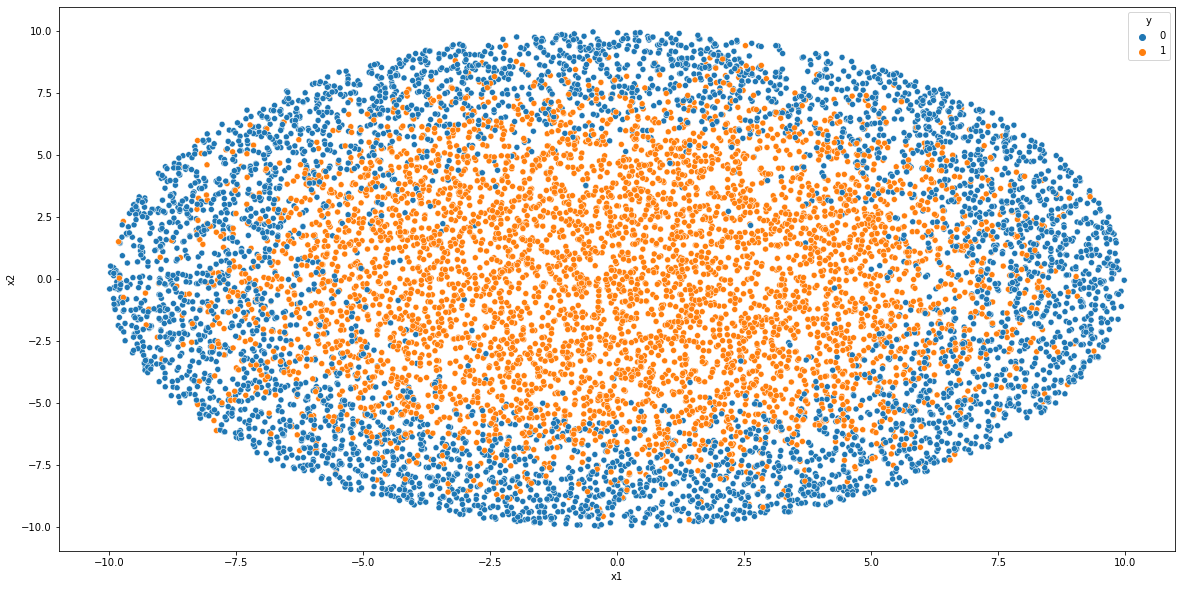

In [3]:
plt.figure(figsize=(20, 10))
sns.scatterplot(x="x1", y="x2", hue="y", data = df)

После просмотра данных встает несколько вопросов:
 * 1) Можем ли мы построить идеальную модель ? (условная метрика точность)
 - Задача сложна для человека, построить идеальную модель нельзя.
 * 2) Что ещё мы хотим знать о выборке?
 - Баланс классов
 * 3) Какие алгоритмы машинного обучения мы можем эффективно здесь использовать?
 - В общем, нелинейные, а это может быть как полиномиальная регрессия,
 так и деревья решений с нелинейными функциями разделения в узлах,
 так и нейронные сети.

После описательного анализа приступим к построению моделей. Для начала посмотрим, что нам даст Логистическая регрессия. 

In [4]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score

# Разобьем выборку на трэйн/тест
# Comment 1. Using random state to fix results.
# Comment 2. Split into train/valid/test sets and select the best algorithm on valid.
# Comment 3. This selection does not change the size of test set.
X_train, X_test, y_train, y_test = train_test_split(df[['x1','x2']], df['y'], test_size = 0.33, random_state=8)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=8)

print('Train examples & labels', X_train.shape, y_train.shape)
print('Valid examples & labels', X_valid.shape, y_valid.shape)
print('Test  examples & labels', X_test.shape, y_test.shape)

Train examples & labels (5360, 2) (5360,)
Valid examples & labels (1340, 2) (1340,)
Test  examples & labels (3300, 2) (3300,)


Final loss (train) 0.6928324388213049
Final loss (valid) 0.6940214496823442
Accuracy (train) 0.5138059701492538
Accuracy (valid) 0.4992537313432836


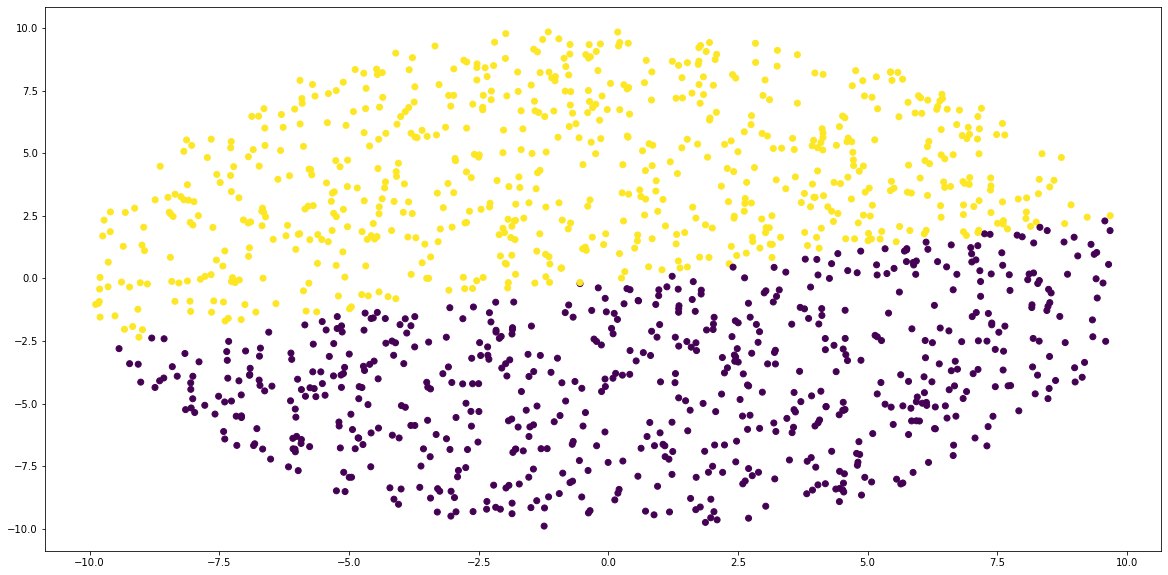

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

#########################################
# Ваш код для Логистической регрессии

log_reg = LogisticRegression(multi_class='multinomial', class_weight='balanced',
                             warm_start=True, n_jobs=2, max_iter=10000, C=0.75)
log_reg.fit(X=X_train, y=y_train)

predict_logit_train =  log_reg.predict(X_train)
predict_logit_valid =  log_reg.predict(X_valid)

predict_log_proba_train = log_reg.predict_proba(X_train)
predict_log_proba_valid = log_reg.predict_proba(X_valid)

print('Final loss (train)', log_loss(y_true=y_train, y_pred=predict_log_proba_train))
print('Final loss (valid)', log_loss(y_true=y_valid, y_pred=predict_log_proba_valid))

print('Accuracy (train)', accuracy_score(y_train, predict_logit_train))
print('Accuracy (valid)', accuracy_score(y_valid, predict_logit_valid))

#########################################

# Заодно визуализируем полученные результаты
plt.figure(figsize=(20, 10))
plt.scatter(x=X_valid['x1'], y=X_valid['x2'], c = predict_logit_valid)
plt.show()

Вообще машинное обучение не только про алгоритмы (нейронные сети не исключение),
 а скорее про обработку данных. Что нам надо добавить, чтобы наш алгоритм отработал без проблем?

Final loss (train) 0.6928316622089556
Final loss (valid) 0.6940231413658379
Accuracy (train) 0.5138059701492538
Accuracy (valid) 0.5007462686567165


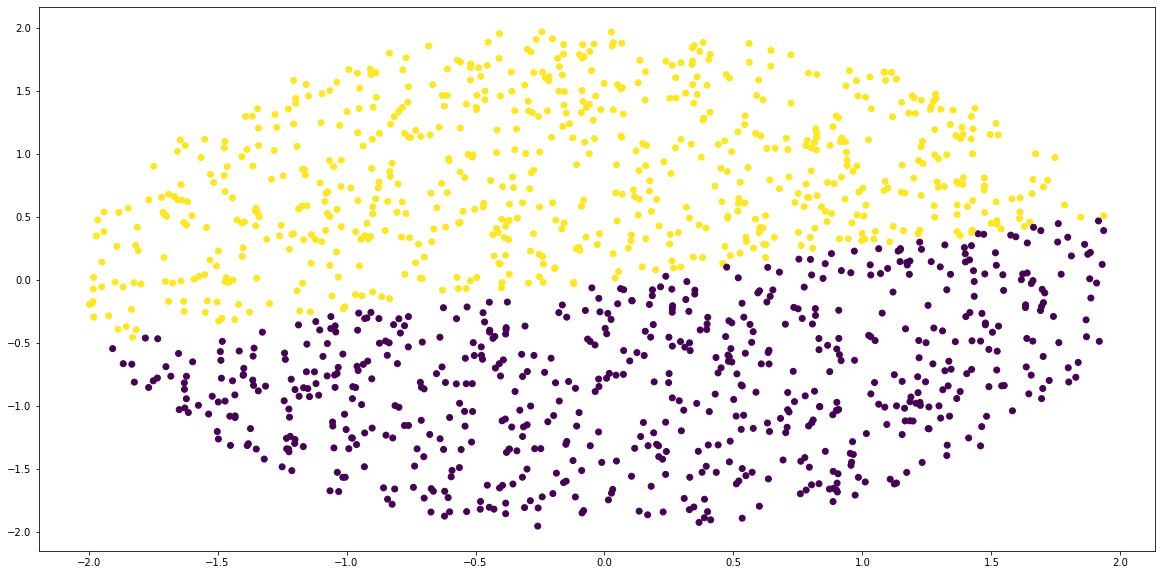

In [6]:
# Повторяем наш код, только с новыми фичами - смотрим на магию
df_new = df.copy()

#########################################
# ваш код для фичей и новой модели

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Note. Choosing optimal parameters is performed on a train dataset
# Note. Division is set to be the same in order to compare results
X_train_new = scaler.fit_transform(X_train)
X_valid_new = scaler.transform(X_valid)
X_test_new = scaler.transform(X_test)

log_reg_scaled = LogisticRegression(multi_class='multinomial', class_weight='balanced',
                                    warm_start=True, n_jobs=2, max_iter=10000, C=0.75)
log_reg_scaled.fit(X=X_train_new, y=y_train)

predict_logit_new_train =  log_reg_scaled.predict(X_train_new)
predict_logit_new_valid =  log_reg_scaled.predict(X_valid_new)

print('Final loss (train)', log_loss(y_true=y_train, y_pred=log_reg_scaled.predict_proba(X_train_new)))
print('Final loss (valid)', log_loss(y_true=y_valid, y_pred=log_reg_scaled.predict_proba(X_valid_new)))

print('Accuracy (train)', accuracy_score(y_train, predict_logit_new_train))
print('Accuracy (valid)', accuracy_score(y_valid, predict_logit_new_valid))

#########################################

# Заодно визуализируем полученные результаты
plt.figure(figsize=(20, 10))
plt.scatter(x=X_valid_new[:, 0], y=X_valid_new[:, 1], c = predict_logit_new_valid)
plt.show()

Переходим к следующему классу алгоритмов - деревья решений. Какая особенность есть у деревьев? Какой параметр надо зафикисировать, чтобы эта особенность не испортила обучение?

Accuracy DTree (train) 0.9373134328358209
Accuracy DTree (valid) 0.7895522388059701


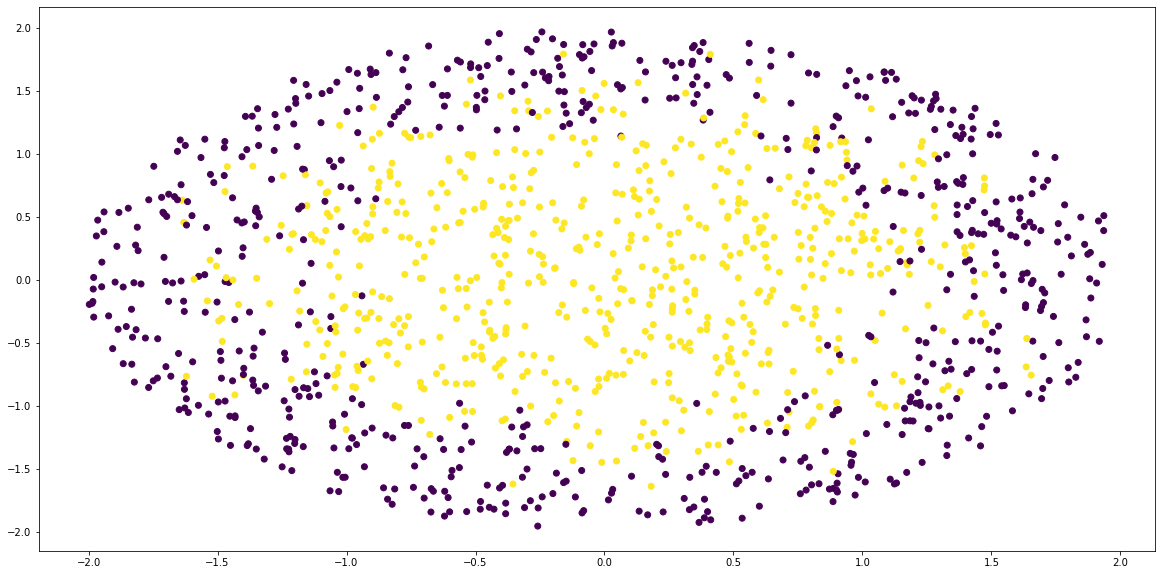

In [7]:
from sklearn.tree import DecisionTreeClassifier

#########################################
# Ваш код

predict_tree = DecisionTreeClassifier(criterion='gini', class_weight='balanced',
                                      min_samples_split=10, )
predict_tree.fit(X=X_train_new, y=y_train)

predict_tree_train = predict_tree.predict(X_train_new)
predict_tree_valid = predict_tree.predict(X_valid_new)

print('Accuracy DTree (train)', accuracy_score(y_train, predict_tree_train))
print('Accuracy DTree (valid)', accuracy_score(y_valid, predict_tree_valid))

#########################################

plt.figure(figsize=(20,10))
plt.scatter(X_valid_new[:, 0], X_valid_new[:, 1], c = predict_tree_valid)
plt.show()

Поможет ли в данном случае ансамбль? Когда в целом ансамбль дает хорошие результаты?

Ответ: в случае, когда классификаторы не коррелированны

Accuracy RandomForest (train) 0.9330223880597015
Accuracy RandomForest (valid) 0.817910447761194


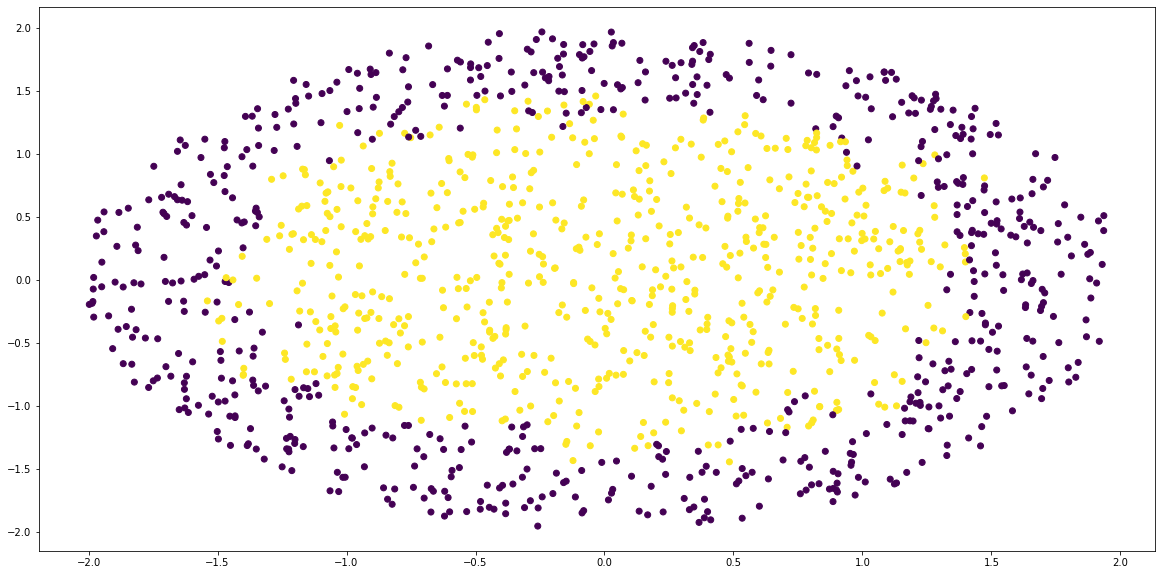

In [8]:
from sklearn.ensemble import RandomForestClassifier

#########################################
# Ваш код

predict_forest = RandomForestClassifier(n_estimators=500, max_depth=None,
                                        min_samples_split=10, n_jobs=4)
predict_forest.fit(X_train_new, y_train)

predict_forest_train = predict_forest.predict(X_train_new)
predict_forest_valid = predict_forest.predict(X_valid_new)

print('Accuracy RandomForest (train)', accuracy_score(y_train, predict_forest_train))
print('Accuracy RandomForest (valid)', accuracy_score(y_valid, predict_forest_valid))

#########################################

plt.figure(figsize=(20, 10))
plt.scatter(X_valid_new[:, 0], X_valid_new[:, 1], c = predict_forest_valid)
plt.show()

ну и наконец мы добрались до нейронок - пора собрать нашу нейроночку под эту задачу.

Соберем простенькую нейронку - нам хватит 2х слоев по 5 нейронов в каждом. Смотрим на предыдущую тетрадки и копипастим все нужное сюда!

In [9]:
# Подгружаем понравившийся фраемворк 
# Собираем сетку
# Учим и радуемся!

Accuracy NNet (train) 0.8376865671641791
Accuracy NNet (valid) 0.8313432835820895


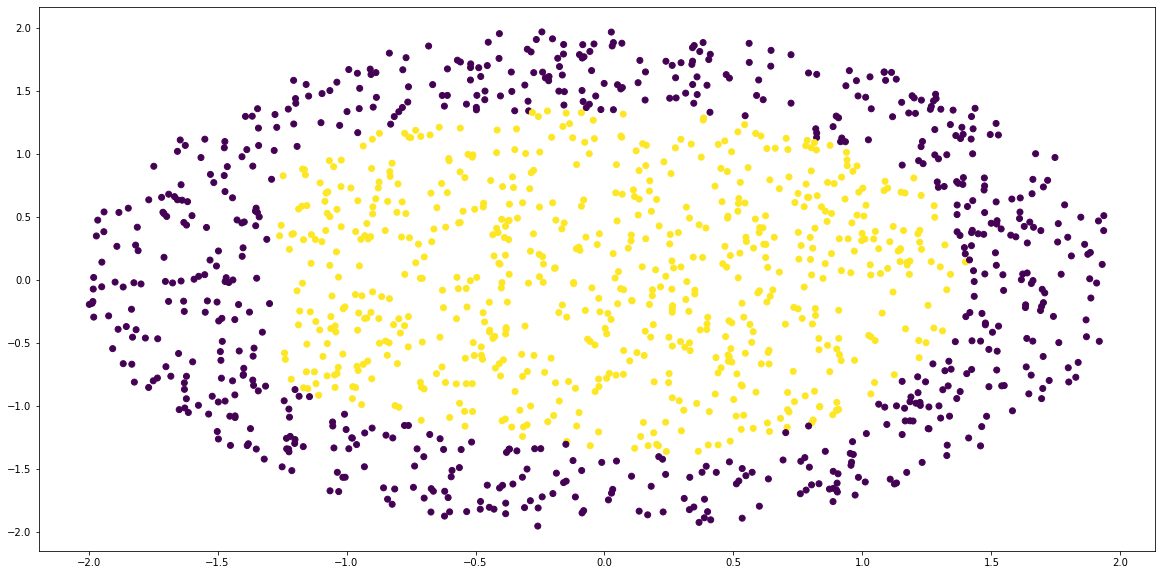

In [10]:
from sklearn.neural_network import MLPClassifier

#########################################
# Ваш код

predict_neural = MLPClassifier(hidden_layer_sizes=(16, 16), activation='relu',
                               solver='adam', learning_rate='adaptive',
                               learning_rate_init=0.001, max_iter=1000,
                               alpha=0.0001, warm_start=True,
                               random_state=28, early_stopping=True)
predict_neural.fit(X_train_new, y_train)

predict_classes_train = predict_neural.predict(X_train_new)
predict_classes_valid = predict_neural.predict(X_valid_new)

print('Accuracy NNet (train)', accuracy_score(y_train, predict_classes_train))
print('Accuracy NNet (valid)', accuracy_score(y_valid, predict_classes_valid))

#########################################

plt.figure(figsize=(20, 10))
plt.scatter(X_valid_new[:, 0], X_valid_new[:, 1], c = predict_classes_valid)
plt.show()

In [11]:
predict_classes_test = predict_neural.predict(X_test_new)
print('Accuracy NNet (test)', accuracy_score(y_test, predict_classes_test))

Accuracy NNet (test) 0.8445454545454546


На этом наше приключение сегодня закончилось. Вопросы максимально желательны :)
